In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams['font.family'] = 'D2Coding'

In [2]:
import os

In [3]:
os.makedirs('./imgs/forecast_res',exist_ok=True)
IMG_PATH = './imgs/forecast_res'

# PM10

# KOSPI

In [30]:
compare_KOSPI_res = pd.read_csv('./비교모델 결과(KOSPI).csv')
compare_KOSPI_res.head()

,forecast(Basic Transformer),forecast(VAR),Real value
0,2973.1309,2907.686095,2945.270020
1,2971.2690,2909.650510,2968.330078
2,2969.7253,2894.269330,2973.250000
3,2970.8810,2890.834679,2991.719971
4,2975.6543,2890.018851,3001.800049


In [31]:
MEaI_KOSPI_res = pd.read_csv('./MEaI 결과(KOSPI).csv')
MEaI_KOSPI_res.head()

,forecast(MEaI Transformer),Real value
0,2948.1475,2945.270020
1,2966.2405,2968.330078
2,2969.9534,2973.250000
3,2972.2913,2991.719971
4,2974.6567,3001.800049


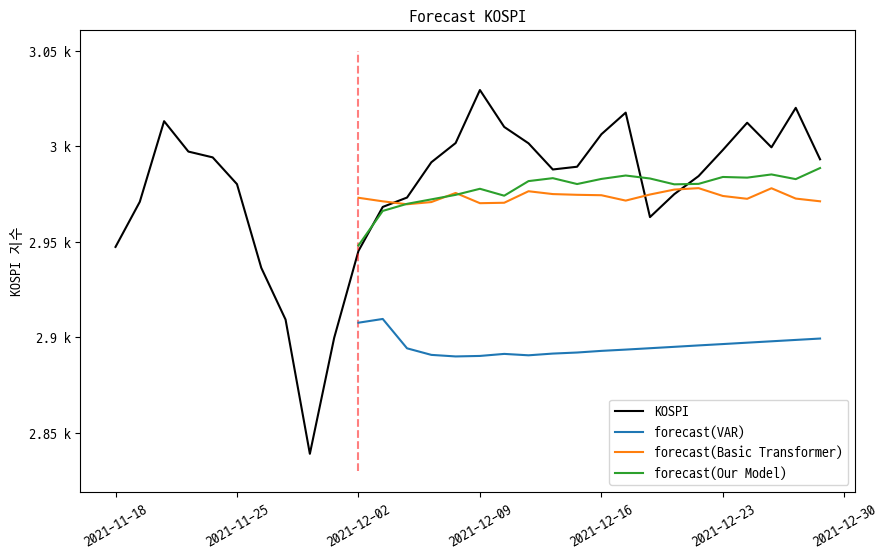

In [120]:
KOSPI_data = pd.read_csv('./data/kospi_financeIndex_and_stock.csv')[['Date','KOSPI']]
ax_xlabels = KOSPI_data.Date.to_numpy()[-31:]
KOSPI_data.drop(columns='Date',inplace=True)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot()

ax.plot(np.arange(30),KOSPI_data.iloc[-31:-1].reset_index(drop=True), color='black' , label = 'KOSPI')
#ax.plot(compare_KOSPI_res['Real value'], color='black' , label = 'KOSPI')
ax.vlines(10,2830,3050,linestyles='dashed',color='red',alpha=0.5)

ax.plot(np.arange(10,30),compare_KOSPI_res['forecast(VAR)'], color='C0' , label = 'forecast(VAR)')
ax.plot(np.arange(10,30),compare_KOSPI_res['forecast(Basic Transformer)'], color='C1' , label = 'forecast(Basic Transformer)')
ax.plot(np.arange(10,30),MEaI_KOSPI_res['forecast(MEaI Transformer)'], color='C2' , label = 'forecast(Our Model)')

ax.set_ylabel('KOSPI 지수')
ax.legend()
ax.yaxis.set_major_formatter(ticker.EngFormatter())
positions = [0, 5, 10, 15, 20, 25, 30]
labels = [ax_xlabels[i] for i in positions]
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))
ax.set_xticklabels(labels, rotation=30)
ax.set_title('Forecast KOSPI')

plt.savefig(f'{IMG_PATH}/KOSPI.png')
plt.show()

In [43]:
Real_values = KOSPI_data.iloc[-21:-1].to_numpy().reshape(-1)
res_var = compare_KOSPI_res['forecast(VAR)'].to_numpy().reshape(-1)
res_BT = compare_KOSPI_res['forecast(Basic Transformer)'].to_numpy().reshape(-1)
res_MEaI = MEaI_KOSPI_res['forecast(MEaI Transformer)'].to_numpy().reshape(-1)

print(res_var.shape)
print(res_BT.shape)
print(res_MEaI.shape)


(20,)
(20,)
(20,)


In [123]:
result = np.array([
    [np.mean((Real_values - res_var)**2),np.mean((Real_values - res_BT)**2),np.mean((Real_values - res_MEaI)**2)],
    [np.mean(abs(Real_values - res_var)),np.mean(abs(Real_values - res_BT)),np.mean(abs(Real_values - res_MEaI))],
    [np.mean(abs(Real_values - res_var)/Real_values)*100,np.mean(abs(Real_values - res_BT)/Real_values)*100,np.mean(abs(Real_values - res_MEaI)/Real_values)*100]
])


pd.DataFrame(result,columns=['VAR','Basic Transformer','Our Model'],index=['MSE','MAE','MAPE'])

,VAR,Basic Transformer,Our Model
MSE,10159.615230,836.001608,516.734147
MAE,97.988233,24.323815,18.040198
MAPE,3.268230,0.809870,0.600141


In [59]:
abs(Real_values - res_MEaI)

array([ 2.87748 ,  2.089578,  3.2966  , 19.428671, 27.143349, 51.730668,
       36.01218 , 19.798112,  4.548551,  9.067093, 23.406712, 32.94198 ,
       20.2295  ,  5.139971,  4.06668 , 14.143922, 28.753132, 14.202649,
       37.34099 ,  4.586139])

In [60]:
Real_values

array([2945.27002 , 2968.330078, 2973.25    , 2991.719971, 3001.800049,
       3029.570068, 3010.22998 , 3001.659912, 2987.949951, 2989.389893,
       3006.409912, 3017.72998 , 2963.      , 2975.030029, 2984.47998 ,
       2998.169922, 3012.429932, 2999.550049, 3020.23999 , 2993.290039])

In [61]:
res_MEaI

array([2948.1475, 2966.2405, 2969.9534, 2972.2913, 2974.6567, 2977.8394,
       2974.2178, 2981.8618, 2983.4014, 2980.3228, 2983.0032, 2984.788 ,
       2983.2295, 2980.17  , 2980.4133, 2984.026 , 2983.6768, 2985.3474,
       2982.899 , 2988.7039])